# Wine Quality Data Set from UCI Machine Learning Lab

*There are two datasets that provide information on samples of red and white variants of the Portuguese "Vinho Verde" wine. Each sample of wine was rated for quality by wine experts and examined with physicochemical tests. Due to privacy and logistic issues, only data on these physicochemical properties and quality ratings are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).*[Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

# Attributes in Each Dataset:

## Physicochemical Properties

1	Fixed Acidity

2	Volatile Acidity

3	Citric Acid

4	Residual Sugar

5	Chlorides

6	Free Sulfur Dioxide

7	Total Sulfur Dioxide

8	Density

9	pH

10	Sulphates

11	Alcohol

## Quality Rating

12	Quality - Score between 0 and 10 (median of at least 3 evaluations made by wine experts)

# --------------------------------------------------------------------------------------------------------------

# Index

 1) **Question Phase**
 
 2) **Data Wrangling**
 
 3) **Explore The Data**
 
 4) **Draw Conclusion**
 
 5) **Communication Phase**

# --------------------------------------------------------------------------------------------------------------

# `1) Questions Phase`

# --------------------------------------------------------------------------------------------------------------


   ### *i ) Do wines with higher alcoholic content receive better ratings?*

   ### *ii ) Do sweeter wines (more residual sugar) receive better ratings?*

   ### *iii ) What level of acidity is associated with the highest quality?*
   
   ### *iv ) Is a certain type of wine (red or white) associated with higher quality?*

# --------------------------------------------------------------------------------------------------------------

## `2) Assessing Data and Data Wrangling`

# --------------------------------------------------------------------------------------------------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
red_wine = pd.read_csv('winequality-red.csv',sep= ';')
white_wine = pd.read_csv('winequality-white.csv',sep= ';')

In [6]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# How many samples of red wine are there?
# How many columns are in each dataset?

red_wine.shape

(1599, 12)

In [9]:
# How many samples of white wine are there?
# How many columns are in each dataset?

white_wine.shape

(4898, 12)

In [10]:
# Which features have missing values?

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# Which features have missing values?

white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
# How many duplicate rows are in the red wine dataset?

sum(red_wine.duplicated())

240

In [13]:
# How many duplicate rows are in the white wine dataset?

sum(white_wine.duplicated())

937

#### Q) Are duplicate rows in these datasets `significant`/ `need to be dropped`?
####  Answer = `Not Necessarily`

In [14]:
# How many unique values of quality are in the red wine dataset?

red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [15]:
# How many unique values of quality are in the white wine dataset?

white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [16]:
# What is the mean density in the red wine dataset?

red_wine['density'].mean()

0.9967466791744833

## Appending Data

### Combine Dataset

In [17]:
# create color array for red dataframe
color_red = np.repeat('red', red_wine.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_wine.shape[0])

In [18]:
red_wine['color'] = color_red
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
white_wine['color'] = color_white
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [20]:
# append dataframes
wine_quality = red_wine.append(white_wine)

# view dataframe to check for success
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Renaming Column

In [21]:
wine_quality.rename(columns={'residual sugar':'residual_sugar',
                             'fixed acidity':'fixed_acidity',
                             'volatile acidity':'volatile_acidity',
                             'citric acid':'citric_acid',
                             'free sulfur dioxide':'free_sulfur_dioxide',
                             'total sulfur dioxide':'total_sulfur_dioxide'},
                    inplace=True)

In [22]:
# How many rows are in the combined dataframe?
# How many columns are in the combined dataframe?

wine_quality.shape

(6497, 13)

In [23]:
wine_quality.to_csv('winequality_edited.csv',index=False)

# --------------------------------------------------------------------------------------------------------------

# `3) Explore The Data` 

# --------------------------------------------------------------------------------------------------------------

## Exploring with Visuals

 1) Based on histograms of columns in this dataset, `Fixed Acidity`, `Total Sulfur Dioxide`, `pH`, `Alcohol`.

 2) Based on scatterplots of quality against different feature variables, `Volatile Acidity`, `Residual Sugar`, `pH`, `Alcohol`

### 1) Histograms for Various Features

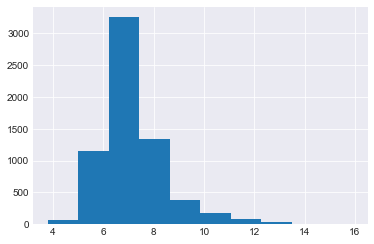

In [24]:
wine_quality['fixed_acidity'].hist();

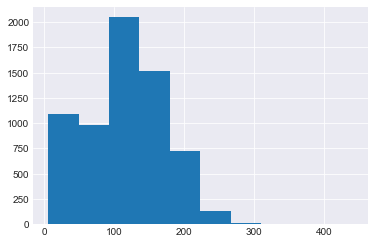

In [25]:
wine_quality['total_sulfur_dioxide'].hist();

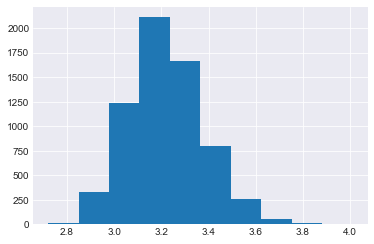

In [26]:
wine_quality['pH'].hist();

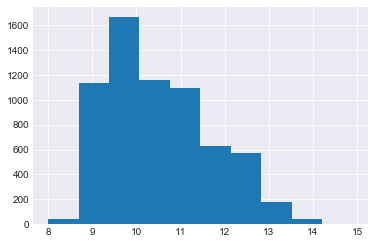

In [27]:
wine_quality['alcohol'].hist();

### Q) Based on histograms of columns in this dataset,
### `which feature variables appear skewed to the right?`

### Answer

#### 1) `Fixed Acidity`

#### 2) `Alcohol`

### 2) Scatterplots of Quality Against Various Features

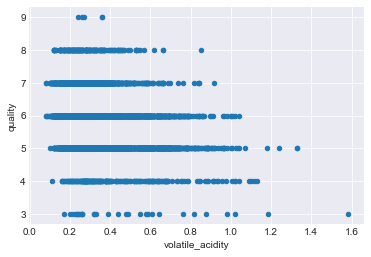

In [28]:
wine_quality.plot(x="volatile_acidity", y="quality", kind="scatter");

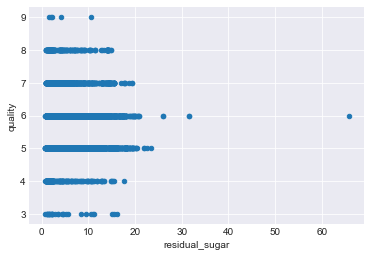

In [29]:
wine_quality.plot(x="residual_sugar", y="quality", kind="scatter");

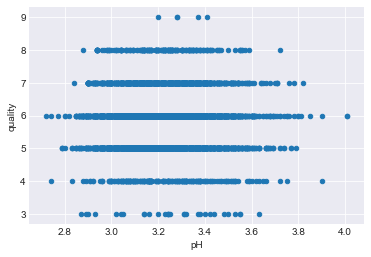

In [30]:
wine_quality.plot(x="pH", y="quality", kind="scatter");

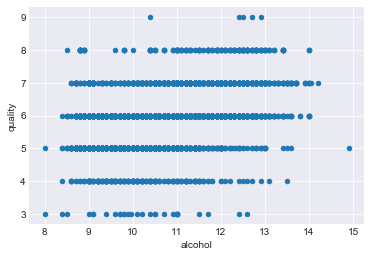

In [31]:
wine_quality.plot(x="alcohol", y="quality", kind="scatter");

### Q) Based on scatterplots of quality against different feature variables, 
### `which of the following is most likely to have a positive impact on quality?`

### Answer

#### `Alcohol`

# --------------------------------------------------------------------------------------------------------------

# `4) Drawing Conclusions`

# --------------------------------------------------------------------------------------------------------------

### i ) Do wines with `higher alcoholic` content generally receive `better ratings`?

In [39]:
# get the median amount of alcohol content
wine_quality.alcohol.median()

10.3

In [40]:
# select samples with alcohol content less than the median
low_alcohol = wine_quality.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_quality.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_quality.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [41]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

### Answer = `Yes`

### ii ) Do `sweeter wines` generally receive `higher ratings`?

In [42]:
# get the median amount of residual sugar
wine_quality['residual_sugar'].median()

3.0

In [43]:
# select samples with residual sugar less than the median
low_sugar = wine_quality.query('residual_sugar < 3.0')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_quality.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [44]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

### Answer = `Yes`

### iii ) What level of acidity receives the `highest mean quality rating`?

### Note :-   
  **Acidity Levels:**
   
   High: Lowest 25% of pH values
   
   Moderately High: 25% - 50% of pH values
   
   Medium: 50% - 75% of pH values
   
   Low: 75% - max pH value

In [33]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_quality.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [34]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [35]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [36]:
# Creates acidity_levels column
wine_quality['acidity_levels'] = pd.cut(wine_quality['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [37]:
# Find the mean quality of each acidity level with groupby
wine_quality.groupby(['acidity_levels']).mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

### Answer = `Low`

### iv ) Is the mean quality of red wine `greater than, less than, or equal` to that of white wine?

In [32]:
# Find the mean quality of each wine type (red and white) with groupby
wine_quality.groupby(['color'])['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### Answer = `Less`

In [38]:
# Save changes for the next section
wine_quality.to_csv('winequality_edited.csv', index=False)

# --------------------------------------------------------------------------------------------------------------

# `5) Communication Phase`

# --------------------------------------------------------------------------------------------------------------

## Data Visualization

### i ) Do wines with `higher alcoholic` content receive `better ratings`?

In [45]:
median = wine_quality['alcohol'].median()
low = wine_quality.query('alcohol < {}'.format(median))
high = wine_quality.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

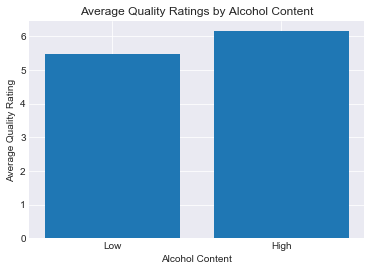

In [46]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### ii ) Do `sweeter wines` receive `higher ratings`?

In [47]:
# Use query to select each group and get its mean quality

median = wine_quality['residual_sugar'].median()
low = wine_quality.query('residual_sugar < {}'.format(median))
high = wine_quality.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

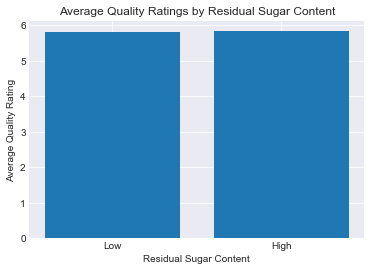

In [48]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Content')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating');


### iii ) What `level of acidity` receives the `highest average rating`?

In [49]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = wine_quality.groupby('acidity_levels').quality.mean()
acidity_level_quality_means

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [50]:
acidity_level_quality_means.reset_index

<bound method Series.reset_index of acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64>

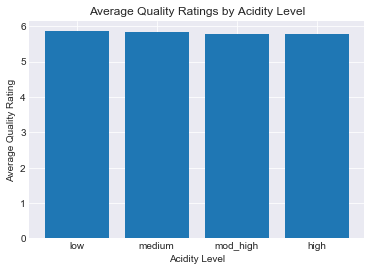

In [51]:
# Create a bar chart with proper labels
locations = [4, 3, 2, 1]  # reorder values above to go from low to high
heights = acidity_level_quality_means

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');


### iv ) Is a certain type of `wine (red or white)` associated with `higher quality`?


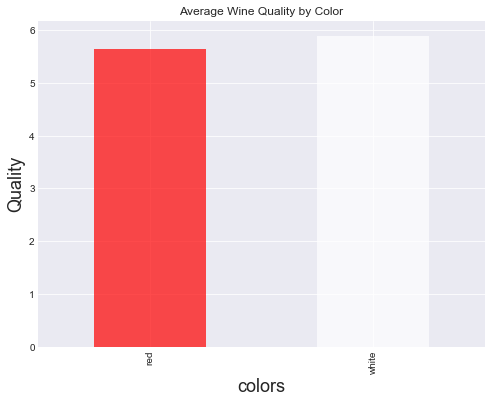

In [52]:
# Find the mean quality of each wine type (red and white) with groupby
colors = ['red','white']
color_mean = wine_quality.groupby(['color'])['quality'].mean()
color_mean.plot(kind = 'bar', title = 'Average Wine Quality by Color', color=colors,alpha=.7,figsize=(8,6))
plt.xlabel('colors',fontsize=18)
plt.ylabel('Quality',fontsize=18);

### Create arrays for red bar heights white bar heights

1) Red bar proportions = counts for each quality rating / total # of red samples

2) White bar proportions = counts for each quality rating / total # of white samples

In [53]:
# get counts for each rating and color
color_counts = wine_quality.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [54]:
# get total counts for each color
color_totals = wine_quality.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [55]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [56]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [57]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [58]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

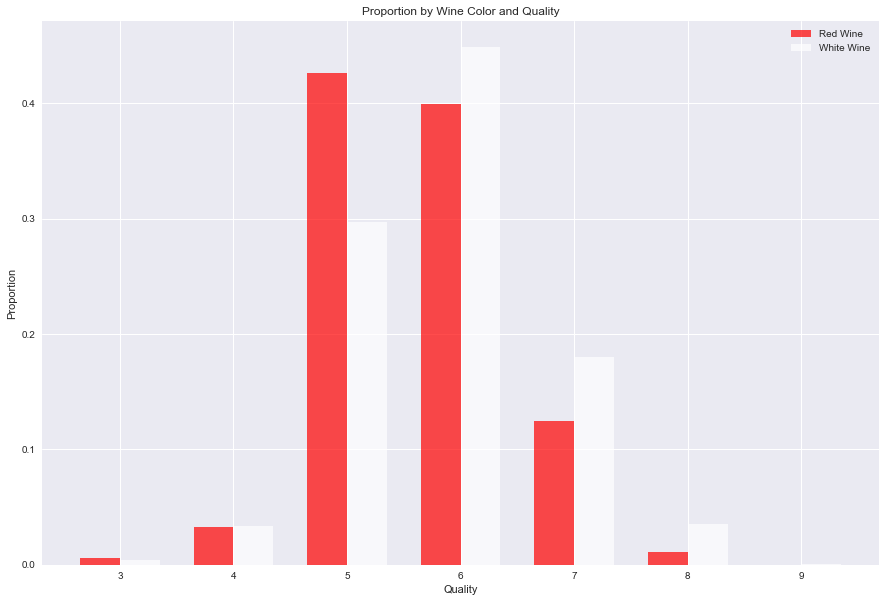

In [60]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();
sns.set(rc={'figure.figsize':(15,10)})